<a href="https://colab.research.google.com/github/Gui13715/graphic-report-python/blob/main/Gr%C3%A1ficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Quantidade de pontos de dados: 9
Volume do ponto 1: 16.2
Ptot_V do ponto 1: 16.41
Volume do ponto 2: 14.6
Ptot_V do ponto 2: 15.782
Volume do ponto 3: 13.7
Ptot_V do ponto 3: 15.398
Volume do ponto 4: 12.4
Ptot_V do ponto 4: 14.371
Volume do ponto 5: 11.5
Ptot_V do ponto 5: 14.087
Volume do ponto 6: 10.6
Ptot_V do ponto 6: 13.44
Volume do ponto 7: 9.9
Ptot_V do ponto 7: 12.998
Volume do ponto 8: 9
Ptot_V do ponto 8: 12.348
Volume do ponto 9: 8
Ptot_V do ponto 9: 11.344


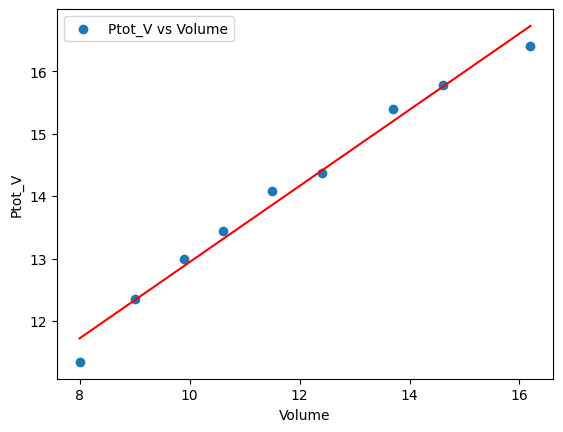

In [ ]:
#Algoritmo para gerar gráfico a partir de dados coletados em experimentos (UFABC)

import matplotlib.pyplot as plt
import numpy as np

# Solicitar a quantidade e valor dos dados
def plot_custom_data():
    n = int(input("Quantidade de pontos de dados: "))
    volume = []
    Ptot_V = []
    for i in range(n):
        vol = float(input(f"Volume do ponto {i+1}: "))
        ptot_v = float(input(f"Ptot_V do ponto {i+1}: "))
        volume.append(vol)
        Ptot_V.append(ptot_v)

    # Modificar legendas
    plt.scatter(volume, Ptot_V, label="Ptot_V vs Volume")
    plt.legend()
    plt.xlabel("Volume")
    plt.ylabel("Ptot_V")

    # Ajustar um polinômio de grau 1 (linha reta)
    coeffs = np.polyfit(volume, Ptot_V, 1)

    # Gerar pontos para a linha de tendência
    x_fit = np.linspace(min(volume), max(volume), 100)
    y_fit = np.polyval(coeffs, x_fit)

    # Plotar a linha de tendência
    plt.plot(x_fit, y_fit, color="red", label="Linha de Tendência")
    plt.show()

# Executar a função
plot_custom_data()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


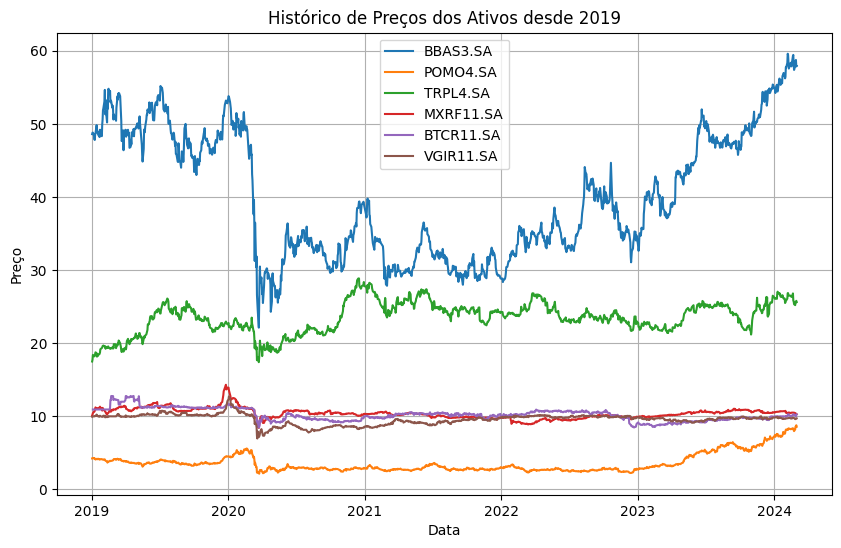

In [ ]:
# Gráfico Cotação Ativos Tabela EXCEL

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def plot_asset_history(symbols):
    # Criar um DataFrame vazio para armazenar os dados de todos os ativos
    all_data = pd.DataFrame()

    # Para Obter dados históricos de cada ativo desde 2019
    for symbol in symbols:
        data = yf.download(symbol, start='2019-01-01', end=pd.to_datetime('today'))
        data = data['Close'].reset_index().rename(columns={'Close': symbol})
        if all_data.empty:
            all_data = data
        else:
            all_data = pd.merge(all_data, data, on='Date', how='outer')

    # Plotar o gráfico
    plt.figure(figsize=(10, 6))
    for symbol in symbols:
        plt.plot(all_data['Date'], all_data[symbol], label=symbol)
    plt.title('Histórico de Preços dos Ativos desde 2019')
    plt.xlabel('Data')
    plt.ylabel('Preço')
    plt.legend()
    plt.grid(True)
    plt.show()

# Lista dos ativos
symbols = ['BBAS3.SA', 'POMO4.SA', 'TRPL4.SA', 'MXRF11.SA', 'BTCR11.SA', 'VGIR11.SA']

# Chamar a função
plot_asset_history(symbols)
